In [3]:
#!pip install roboflow
!pip install ultralytics

  Using cached ultralytics-8.2.28-py3-none-any.whl (779 kB)
  Using cached ultralytics_thop-0.2.7-py3-none-any.whl (25 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using ca

In [5]:
from roboflow import Roboflow
rf = Roboflow(api_key="RiiNI2YfI3h7h2hItphi")
project = rf.workspace("hyunjin").project("korea-car-license-plate")
version = project.version(2)
dataset = version.download("yolov9")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Korea-Car-License-Plate-2 in yolov9:: 100%|██████████| 1006/1006 [00:00<00:00, 6452.66it/s]


In [7]:
from ultralytics import YOLO

# Build a YOLOv9c model from pretrained weight
model = YOLO('yolov9c.pt')

# Display odel information ( optional)
model.info()

# Train the model on the COCOB example dataset for 100 epochs
results = model.train(data='/content/Korea-Car-License-Plate-2/data.yaml', \
                      batch = 16, save = True, epochs = 100, imgsz = 640, project = "carplate")


YOLOv9c summary: 618 layers, 25590912 parameters, 0 gradients, 104.0 GFLOPs
Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=/content/Korea-Car-License-Plate-2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=carplate, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fra

100%|██████████| 755k/755k [00:00<00:00, 20.1MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    212864  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 1]        
  3                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
  4                  -1  1    847616  ultralytics.nn.modules.block.RepNCSPELAN4    [256, 512, 256, 128, 1]       
  5                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
  6                  -1  1   2857472  ultralytics.nn.modules.block.RepNCSPELAN4    [512, 512, 512, 256, 1]       
  7                  -1  1    656384  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 110MB/s]
Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)


AMP: checks passed ✅


train: Scanning /content/Korea-Car-License-Plate-2/train/labels... 435 images, 0 backgrounds, 0 corrupt: 100%|██████████| 435/435 [00:00<00:00, 1679.02it/s]

train: New cache created: /content/Korea-Car-License-Plate-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Korea-Car-License-Plate-2/valid/labels... 42 images, 1 backgrounds, 0 corrupt: 100%|██████████| 42/42 [00:00<00:00, 564.00it/s]

val: New cache created: /content/Korea-Car-License-Plate-2/valid/labels.cache


Plotting labels to carplate/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to carplate/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      11.1G      1.928      5.132       1.83          2        640: 100%|██████████| 28/28 [00:25<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.34s/it]

                   all         42         55     0.0116      0.273    0.00785    0.00361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      11.4G      2.141      2.418      2.037          2        640: 100%|██████████| 28/28 [00:22<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         42         55   8.87e-05     0.0182   4.66e-05   2.33e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      11.3G      2.267      2.376       2.27          3        640: 100%|██████████| 28/28 [00:21<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         42         55   8.87e-05     0.0182   4.66e-05   2.33e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      11.6G      2.208      2.146      2.216          5        640: 100%|██████████| 28/28 [00:20<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         42         55   8.87e-05     0.0182   4.66e-05   2.33e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      11.5G      2.172      2.143      2.258          5        640: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.50it/s]

                   all         42         55     0.0002     0.0182   0.000107   1.07e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      11.5G      2.141      2.052      2.169          7        640: 100%|██████████| 28/28 [00:21<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         42         55     0.0568     0.0545    0.00705   0.000952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      11.2G      1.992      1.937      2.089          6        640: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         42         55      0.834      0.364      0.405      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      11.3G      2.004      1.874      2.081          9        640: 100%|██████████| 28/28 [00:20<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         42         55      0.321     0.0182    0.00831    0.00558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      11.2G      2.032      1.903      2.117          7        640: 100%|██████████| 28/28 [00:21<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         42         55     0.0232     0.0545    0.00606    0.00288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      11.3G       2.03      1.861      2.086         11        640: 100%|██████████| 28/28 [00:21<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         42         55      0.493      0.327      0.326       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      11.2G       1.96      1.712      2.014          8        640: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         42         55       0.79      0.564      0.611      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      11.2G      1.911      1.696      1.968          4        640: 100%|██████████| 28/28 [00:20<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         42         55      0.698      0.636      0.697      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      11.3G      1.887      1.627      1.979          3        640: 100%|██████████| 28/28 [00:20<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         42         55      0.835        0.6      0.723      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      11.2G      1.865       1.57       1.98          4        640: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         42         55      0.892      0.509      0.585      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      11.2G      1.882      1.651      1.996          5        640: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         42         55      0.755        0.4      0.424      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      11.2G      1.855      1.578      1.921         11        640: 100%|██████████| 28/28 [00:21<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.77it/s]

                   all         42         55      0.784      0.594       0.64       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      11.2G      1.877      1.481      1.886          6        640: 100%|██████████| 28/28 [00:20<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         42         55       0.83      0.618      0.695      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      11.3G       1.86      1.421      1.922          3        640: 100%|██████████| 28/28 [00:20<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         42         55       0.71      0.673      0.716      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      11.2G      1.786      1.426      1.835          9        640: 100%|██████████| 28/28 [00:21<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]

                   all         42         55      0.779      0.618      0.662      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      11.2G      1.819      1.459      1.883          4        640: 100%|██████████| 28/28 [00:21<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         42         55      0.703      0.655      0.729      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      11.2G      1.817      1.391      1.877          2        640: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         42         55       0.85      0.514      0.658      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      11.5G      1.756      1.431       1.84          1        640: 100%|██████████| 28/28 [00:20<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]

                   all         42         55      0.905      0.518      0.681      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      11.6G      1.806      1.388      1.851          5        640: 100%|██████████| 28/28 [00:20<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         42         55       0.94      0.564      0.759      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      11.2G      1.782       1.42      1.872          5        640: 100%|██████████| 28/28 [00:20<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         42         55      0.916      0.597      0.746      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      11.2G       1.79      1.363      1.857          8        640: 100%|██████████| 28/28 [00:20<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         42         55      0.767      0.673      0.778      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      11.2G      1.787      1.354      1.904          7        640: 100%|██████████| 28/28 [00:20<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         42         55      0.833      0.725      0.796      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      11.2G       1.74      1.354      1.822          8        640: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         42         55      0.866      0.703      0.793      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      11.2G      1.758      1.318      1.803          5        640: 100%|██████████| 28/28 [00:20<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         42         55      0.792      0.745      0.834       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      11.2G      1.698      1.283      1.746          1        640: 100%|██████████| 28/28 [00:20<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         42         55      0.888      0.564      0.738      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      11.2G      1.728       1.25      1.789          6        640: 100%|██████████| 28/28 [00:20<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         42         55      0.775      0.709      0.772      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      11.2G      1.677       1.24      1.778          6        640: 100%|██████████| 28/28 [00:20<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         42         55      0.858      0.709      0.825      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      11.5G      1.691      1.212      1.771          4        640: 100%|██████████| 28/28 [00:21<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         42         55      0.768      0.664      0.742      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      11.2G      1.688      1.254      1.774          4        640: 100%|██████████| 28/28 [00:20<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         42         55      0.864      0.636      0.781      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      11.2G        1.7       1.29      1.829          6        640: 100%|██████████| 28/28 [00:20<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         42         55      0.811      0.636      0.787      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      11.2G      1.676      1.249       1.75          2        640: 100%|██████████| 28/28 [00:20<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         42         55      0.882      0.618      0.772      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      11.5G      1.639        1.2      1.736          4        640: 100%|██████████| 28/28 [00:20<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         42         55      0.901      0.636      0.808      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      11.2G      1.667      1.169      1.744          9        640: 100%|██████████| 28/28 [00:20<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         42         55      0.828      0.764      0.851      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      11.2G      1.618      1.276      1.795          1        640: 100%|██████████| 28/28 [00:20<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         42         55      0.869      0.582      0.729      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      11.2G       1.69      1.248      1.847          5        640: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]

                   all         42         55      0.726      0.722      0.822      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      11.2G      1.624       1.16      1.712          5        640: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         42         55      0.817      0.728      0.834      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      11.2G      1.623      1.148      1.719          8        640: 100%|██████████| 28/28 [00:20<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         42         55      0.839        0.8      0.889      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      11.2G      1.622      1.109       1.68          6        640: 100%|██████████| 28/28 [00:20<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         42         55      0.948      0.667      0.846      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      11.2G      1.556      1.074      1.691          8        640: 100%|██████████| 28/28 [00:20<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]

                   all         42         55      0.818      0.727      0.822      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      11.2G      1.588      1.038      1.626          4        640: 100%|██████████| 28/28 [00:20<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         42         55      0.831      0.713      0.853      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      11.2G      1.584      1.148      1.737          3        640: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.94it/s]

                   all         42         55      0.891      0.727      0.879      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      11.2G      1.557      1.066       1.67          6        640: 100%|██████████| 28/28 [00:20<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         42         55      0.821      0.745      0.816      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      11.2G      1.599       1.02      1.692          4        640: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         42         55      0.859        0.6      0.785      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      11.2G      1.585      1.086      1.671          8        640: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         42         55      0.752      0.709      0.793      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      11.2G      1.536      1.072      1.624          7        640: 100%|██████████| 28/28 [00:20<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         42         55      0.947      0.648      0.825      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      11.2G      1.566       1.09      1.656          4        640: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         42         55      0.819      0.691      0.774      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      11.2G      1.575      1.031      1.674          3        640: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         42         55      0.816      0.808      0.879      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      11.2G      1.538      1.044      1.661          6        640: 100%|██████████| 28/28 [00:21<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]

                   all         42         55      0.948      0.666      0.853      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      11.2G      1.495       1.03      1.588          5        640: 100%|██████████| 28/28 [00:21<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         42         55      0.875      0.709      0.877      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      11.2G      1.494      1.035      1.627          5        640: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         42         55      0.911      0.746      0.897      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      11.2G      1.547      1.022      1.627          6        640: 100%|██████████| 28/28 [00:21<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         42         55      0.793      0.768      0.844      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      11.2G      1.543      1.043      1.636         11        640: 100%|██████████| 28/28 [00:20<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.76it/s]

                   all         42         55      0.888      0.724      0.868       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      11.2G      1.541      1.028      1.613          7        640: 100%|██████████| 28/28 [00:20<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         42         55      0.874      0.756       0.88      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      11.2G      1.446     0.9329      1.562          5        640: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         42         55      0.908      0.709      0.857      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      11.3G      1.469     0.9516      1.584          1        640: 100%|██████████| 28/28 [00:21<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         42         55      0.918      0.813      0.904      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      11.2G      1.505     0.9306      1.612          4        640: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         42         55      0.954      0.782      0.917      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      11.2G      1.441     0.9508      1.616          7        640: 100%|██████████| 28/28 [00:20<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         42         55      0.868      0.782      0.903       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      11.2G      1.451     0.9251      1.579         12        640: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         42         55      0.863      0.804      0.894      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      11.2G      1.453     0.9442      1.581          6        640: 100%|██████████| 28/28 [00:20<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]

                   all         42         55      0.871      0.891      0.925      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      11.2G      1.446     0.9606      1.583          8        640: 100%|██████████| 28/28 [00:20<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.45it/s]

                   all         42         55      0.831        0.8      0.919      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      11.3G      1.398     0.9238      1.555          3        640: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         42         55      0.816      0.909      0.935      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      11.2G      1.421     0.9605      1.587          4        640: 100%|██████████| 28/28 [00:20<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

                   all         42         55      0.903      0.849      0.937      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      11.2G      1.373     0.9105      1.528          4        640: 100%|██████████| 28/28 [00:21<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         42         55       0.92      0.833      0.932      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      11.2G      1.426     0.9027       1.53          3        640: 100%|██████████| 28/28 [00:20<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         42         55      0.839      0.852      0.897      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      11.2G      1.418     0.9498      1.585          8        640: 100%|██████████| 28/28 [00:20<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         42         55       0.87      0.891      0.933      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      11.2G      1.426     0.9382      1.562          9        640: 100%|██████████| 28/28 [00:20<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         42         55       0.82      0.909      0.926      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      11.5G      1.381     0.9212      1.537          5        640: 100%|██████████| 28/28 [00:20<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         42         55      0.919      0.836      0.928      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      11.5G      1.365     0.8751      1.498          4        640: 100%|██████████| 28/28 [00:20<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         42         55      0.958      0.825      0.932      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      11.5G      1.389     0.8509      1.498          5        640: 100%|██████████| 28/28 [00:20<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         42         55      0.895      0.891      0.955      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      11.2G      1.393     0.8996      1.567          6        640: 100%|██████████| 28/28 [00:21<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         42         55      0.889      0.878      0.925      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      11.2G      1.349     0.8742       1.51          6        640: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         42         55      0.793      0.909      0.902      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      11.2G      1.334     0.8835      1.463          4        640: 100%|██████████| 28/28 [00:20<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         42         55       0.87      0.855      0.912      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      11.2G      1.338     0.8556      1.479         11        640: 100%|██████████| 28/28 [00:21<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         42         55      0.859      0.886       0.93      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      11.2G      1.366      0.848      1.524          5        640: 100%|██████████| 28/28 [00:20<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         42         55      0.914      0.964      0.958      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      11.2G      1.327     0.8702      1.502          7        640: 100%|██████████| 28/28 [00:20<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         42         55      0.942      0.818      0.942      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      11.2G      1.321     0.9121      1.483          3        640: 100%|██████████| 28/28 [00:21<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         42         55      0.864      0.909      0.935      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      11.2G      1.273     0.8294      1.487          3        640: 100%|██████████| 28/28 [00:20<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         42         55      0.884      0.927      0.942      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      11.2G      1.297     0.8083      1.477          4        640: 100%|██████████| 28/28 [00:20<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         42         55      0.836      0.928      0.949      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      11.2G      1.279     0.7663      1.422          3        640: 100%|██████████| 28/28 [00:20<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         42         55      0.863      0.915      0.949      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      11.2G      1.266     0.8015      1.449          7        640: 100%|██████████| 28/28 [00:20<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.40it/s]

                   all         42         55       0.92      0.891      0.956      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      11.2G      1.273     0.8024      1.479          2        640: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         42         55      0.849       0.92      0.945      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      11.2G      1.266     0.7973      1.417          5        640: 100%|██████████| 28/28 [00:20<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.08it/s]

                   all         42         55       0.82      0.927      0.927      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      11.2G      1.242     0.7954      1.438          8        640: 100%|██████████| 28/28 [00:21<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         42         55      0.913      0.927      0.961      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      11.2G      1.266     0.8077      1.466          8        640: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         42         55      0.922      0.927      0.958      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      11.2G      1.333     0.8249      1.509          3        640: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         42         55      0.893      0.891      0.955      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      11.2G      1.212     0.7711      1.396          5        640: 100%|██████████| 28/28 [00:21<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         42         55      0.908      0.897       0.96      0.629


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      11.2G      1.258     0.7106      1.505          3        640: 100%|██████████| 28/28 [00:22<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         42         55      0.852      0.945      0.953      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      11.2G      1.222     0.6961      1.491          3        640: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         42         55      0.865       0.93       0.95      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      11.2G      1.196     0.6982      1.442          4        640: 100%|██████████| 28/28 [00:20<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         42         55      0.867      0.944      0.959      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      11.2G      1.162     0.6685      1.444          3        640: 100%|██████████| 28/28 [00:20<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]

                   all         42         55      0.921      0.891      0.957      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      11.2G      1.153     0.6691       1.44          3        640: 100%|██████████| 28/28 [00:20<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         42         55      0.882      0.956      0.958      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      11.2G      1.154     0.6621      1.442          3        640: 100%|██████████| 28/28 [00:20<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.46it/s]

                   all         42         55      0.866      0.941      0.951      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      11.2G      1.149     0.6505      1.409          4        640: 100%|██████████| 28/28 [00:20<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.09it/s]

                   all         42         55       0.89      0.945      0.954      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      11.2G      1.134     0.6619      1.452          3        640: 100%|██████████| 28/28 [00:20<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         42         55      0.854      0.961      0.955      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      11.2G      1.139      0.669      1.413          3        640: 100%|██████████| 28/28 [00:20<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         42         55      0.851      0.964      0.957      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      11.2G      1.132     0.6412      1.401          3        640: 100%|██████████| 28/28 [00:20<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         42         55      0.869      0.962      0.956      0.627



100 epochs completed in 0.664 hours.
Optimizer stripped from carplate/train2/weights/last.pt, 51.6MB
Optimizer stripped from carplate/train2/weights/best.pt, 51.6MB

Validating carplate/train2/weights/best.pt...
Ultralytics YOLOv8.2.28 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c summary (fused): 384 layers, 25320019 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]


                   all         42         55      0.863      0.916      0.948      0.663
Speed: 0.2ms preprocess, 16.8ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to carplate/train2


In [8]:
#번호판추론
from ultralytics import YOLO
model = YOLO('/content/carplate/train2/weights/best.pt')

#valid 폴더 안에 있는 모든 이미지들을 추론한 후 ./runs안에 추론 결과 이미지를 저장
result = model.predict(source="/content/Korea-Car-License-Plate-2/test/images", save = True, imgsz=640)


image 1/20 /content/Korea-Car-License-Plate-2/test/images/101_jpg.rf.45442a5299aefa97ebe75908e13c245f.jpg: 640x640 2 LicensePlates, 57.9ms
image 2/20 /content/Korea-Car-License-Plate-2/test/images/104_jpg.rf.90eed46b090ca4304e29744570152773.jpg: 640x640 1 LicensePlate, 49.6ms
image 3/20 /content/Korea-Car-License-Plate-2/test/images/12_jpg.rf.947531831eb215ceb3682463fc88296f.jpg: 640x640 (no detections), 49.6ms
image 4/20 /content/Korea-Car-License-Plate-2/test/images/15_jpg.rf.58d7f38b57fbe676e1cf5a464272a159.jpg: 640x640 2 LicensePlates, 49.5ms
image 5/20 /content/Korea-Car-License-Plate-2/test/images/16_jpg.rf.48a4921e779c5a9250e2dcf84fab120f.jpg: 640x640 4 LicensePlates, 49.6ms
image 6/20 /content/Korea-Car-License-Plate-2/test/images/17_jpg.rf.92bf11237addd4a36744cae56fd684c2.jpg: 640x640 1 LicensePlate, 42.4ms
image 7/20 /content/Korea-Car-License-Plate-2/test/images/46_jpg.rf.39bc87def710ee3be3ee4605330b8766.jpg: 640x640 1 LicensePlate, 32.7ms
image 8/20 /content/Korea-Car-Lice

In [10]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 21.2 MB/s eta 0:00:00


Results saved to runs/detect/predict16
Detected text: 122버 53769
Valid plate detected: 22버 5376


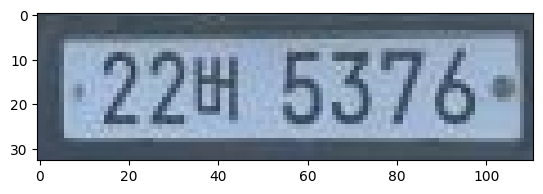

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import easyocr
import warnings
import re

warnings.filterwarnings("ignore")
plate_model = YOLO('/content/carplate/train2/weights/best.pt')

# EasyOCR 리더 객체 생성
reader = easyocr.Reader(['ko'])

img = cv2.imread("/content/Korea-Car-License-Plate-2/valid/images/IMG_2691_jpg.rf.d3b13368148a3bece64a818d1949490f.jpg")

# 번호판 detection
plate_result = plate_model.predict(source=img, save=True, verbose=False, conf=0.6)

# 번호판 정규 표현식 패턴 (두 글자, 한글, 네 숫자)
plate_pattern = re.compile(r'^[가-힣]{2} [가-힣] \d{4}$')

# 예측된 바운딩 박스를 순회
for bbox in plate_result[0].boxes:
    # 바운딩 박스 좌표 추출
    x1, y1, x2, y2 = map(int, bbox.xyxy[0])
    # 바운딩 박스 영역 크롭
    cropped_img = img[y1:y2, x1:x2]
    # EasyOCR을 사용하여 텍스트 인식
    ocr_result = reader.readtext(cropped_img)

    if len(ocr_result) > 0:
        # 인식된 텍스트 출력
        ocr_bbox, text, prob = ocr_result[0]
        print(f"Detected text: {text}")

        # 정규 표현식으로 텍스트 검증
        match = plate_pattern.match(text)
        if match:
            print(f"Valid plate detected: {text}")

        else:
            # 추가 조건 검증
            parts = re.split(r'(\D+)', text)

            front_digits = parts[0]
            back_digits = parts[2]

            if len(front_digits) > 2 and len(back_digits) > 4:
              print(f"Valid plate detected: {text[1:-1]}")
            elif len(front_digits) > 2:
              print(f"Valid plate detected: {text[1:]}")
            elif len(back_digits) > 4:
              print(f"Valid plate detected: {text[:-1]}")

        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        plt.show()


frame:0, Detected text: 371드2250
frame:0, Detected text: 371드2250
frame:0, Detected text: 371드3250
frame:0, Detected text: 371드2250


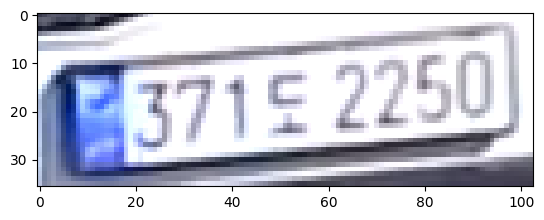

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import easyocr
import warnings
import re
warnings.filterwarnings("ignore")
plate_model = YOLO('/content/carplate/train2/weights/best.pt')

# EasyOCR 리더 객체 생성
reader = easyocr.Reader(['ko'])

#동영상 파일 경로
video_path = "tet1.mp4"

# 동영상 캡처 객체 생성
cap = cv2.VideoCapture(video_path)

# 1초 간격으로 프레임 처리
frame_interval = 1 #1초간격 처리
frame_count = 0
frame_rate = int(cap.get(cv2.CAP_PROP_FPS))

#출력할 텍스트 패턴 정규표현식 번호판이 앞에 2~3개가 숫자고 그 다음에 한글, 그다음에 숫자 4자리일 때만 출력
pattern = r'^\d{2,3}[가-힣]+\d{4}$'
while True:
  ret, img = cap.read()
  if not ret:
    break
  flag = False
  if frame_count % (frame_rate * frame_interval) == 0:
    #번호판 detection
    plate_result = plate_model.predict(source=img, imgsz=640, verbose=False)
    #예측된 바운딩 박스를 순회
    for bbox in plate_result[0].boxes:
      # 바운딩 박스 좌표 추출
      x1, y1, x2, y2 = map(int, bbox.xyxy[0])
      # 바운딩 박스 영역 크롭
      cropped_img = img[y1:y2, x1:x2]
      #바운딩 박스가 화면 중앙 근처인지 판단
      img_height, img_width, _ = img.shape
      center_x = img_width // 2
      bbox_center_x = (x1 + x2) // 2
      #바운딩 박스의 가로 위치가 중간 영역인지 판단
      img_width = img.shape[1]
      bbox_center_x = (x1 + x2) // 2
      #차량 넘버 플레이트가 화면 중앙 근처에 왔으면
      if img_width // 3 <= bbox_center_x <= img_width * 3 // 3:
        #EasyOCR을 사용하여 텍스트 인식
        ocr_result = reader.readtext(cropped_img)
        if len(ocr_result) > 0:
          #인식된 텍스트 출력
          ocr_bbox, text, prob = ocr_result[0]
          text = re.sub('[^가-힣0-9]', '', text)
          #번호판이 앞에 2~3개가 숫자고 그 다음에 한글, 그다음에 숫자 4자리일 때만 출력
          if re.match(pattern, text):
            print(f"frame:{frame_count}, Detected text: {text}")
            flag = True

            #크롭된 이미지와 OCR 결과를 시각화 표시

        #ocr 사진 확인용
        plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
        #프레임 확인용
        #plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        #plt.title(f"Detected text: {text}")
        #plt.show()
